In [24]:
import tensorflow as tf
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

# Novo caminho do arquivo de eventos antigo
file_path_old = r'C:\Users\Pichau\Desktop\Faculdade\Projects\Facul Repositorios\Repositorios_Universitarios\Aprendizagem por Refoco\Projeto_Atari\log_dir\SpaceInvaders-v52\events.out.tfevents.1708150849.Vinícius.15048.10'

# Caminho do arquivo de eventos novo (já fornecido)
file_path_new = r'C:\Users\Pichau\Desktop\Faculdade\Projects\Facul Repositorios\Repositorios_Universitarios\Aprendizagem por Refoco\Projeto_Atari\log_dir\PPO_2\events.out.tfevents.1708251979.Vinícius.16172.5'

# Carregar os eventos do arquivo antigo
event_accumulator_old = EventAccumulator(file_path_old)
event_accumulator_old.Reload()

# Carregar os eventos do arquivo novo
event_accumulator_new = EventAccumulator(file_path_new)
event_accumulator_new.Reload()


In [25]:
tags_old = event_accumulator_old.Tags()
tags_new = event_accumulator_new.Tags()

print("Tags disponíveis no arquivo antigo:", tags_old)
print("Tags disponíveis no arquivo novo:", tags_new)


Tags disponíveis no arquivo antigo: {'images': [], 'audio': [], 'histograms': [], 'scalars': ['epsilon', 'epi_reward_100', 'epi_reward'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
Tags disponíveis no arquivo novo: {'images': [], 'audio': [], 'histograms': [], 'scalars': ['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'time/fps', 'train/approx_kl', 'train/clip_fraction', 'train/clip_range', 'train/entropy_loss', 'train/explained_variance', 'train/learning_rate', 'train/loss', 'train/policy_gradient_loss', 'train/value_loss'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}


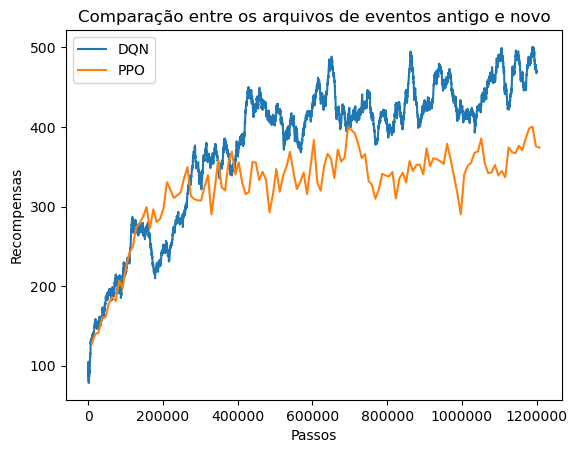

In [31]:
import matplotlib.pyplot as plt

# Definir a tag que você deseja plotar
tag = 'epi_reward_100'
tag2 = 'rollout/ep_rew_mean'

# Extrair os valores de scalars do arquivo antigo
scalars_old = event_accumulator_old.Scalars(tag)
steps_old = [scalar.step for scalar in scalars_old]
values_old = [scalar.value for scalar in scalars_old]

# Extrair os valores de scalars do arquivo novo
scalars_new = event_accumulator_new.Scalars(tag2)
steps_new = [scalar.step for scalar in scalars_new]
values_new = [scalar.value for scalar in scalars_new]

# Plotar os gráficos
plt.plot(steps_old, values_old, label='DQN')
plt.plot(steps_new, values_new, label='PPO')
plt.xlabel('Passos')
plt.ylabel('Recompensas')
plt.title('Comparação entre os arquivos de eventos antigo e novo')
plt.legend()

# Definir o formato dos rótulos do eixo x
plt.ticklabel_format(style='plain', axis='x')

plt.show()
